In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [171]:
def add_more_info(df):
    df['nodes'] = df['g1_nodes'] + df['g2_nodes']
    df['edges'] = df['g1_edges'] + df['g2_edges']
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodesXedges'] = df['edges'] * df['nodes']
    df['uncommon_nodes'] = df['nodes'] - 2 * df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_time'] = np.log(df['time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['uncommon_edges'] = df['edges'] - 2 * df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [5]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    return linear_regressor.coef_, linear_regressor.intercept_, r_squared

In [172]:
df = pd.read_csv("SeleniumClassDiagramData.csv")
add_more_info(df)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time,...,uncommon_nodes,log_uncommon_nodes,log_time,log_nodes,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
0,1.0.11-all vs 1.0.11,1266,813,0,1373,1266,2205,1266,813,72,...,0,-inf,4.276666,7.836765,1392,7.238497,0,-inf,1029258,13.844349
1,1.0.11-all vs 2.0.0-all,1253,2103,23,248,1266,2205,1294,2311,64,...,54,3.988984,4.158883,7.847763,310,5.736572,16740,9.725556,2635059,14.784416
2,1.0.11-all vs 2.0.0,1253,773,23,1448,1266,2205,1294,822,74,...,54,3.988984,4.304065,7.847763,1481,7.300473,79974,11.289457,968569,13.783575
3,1.0.11-all vs 2.10.0-all,1239,2047,56,411,1266,2205,1382,2504,83,...,170,5.135798,4.418841,7.881560,615,6.421622,104550,11.557421,2536233,14.746190
4,1.0.11-all vs 2.10.0,1239,748,44,1512,1266,2205,1382,919,88,...,170,5.135798,4.477337,7.881560,1628,7.395108,276760,12.530906,926772,13.739463


In [100]:
df.describe()['time']

count    4753.000000
mean      230.729434
std       224.045117
min        16.000000
25%        60.000000
50%       148.000000
75%       306.000000
max      1478.000000
Name: time, dtype: float64

In [101]:
quantile = df['time'].quantile(0.99)
plt_df = df[df['time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

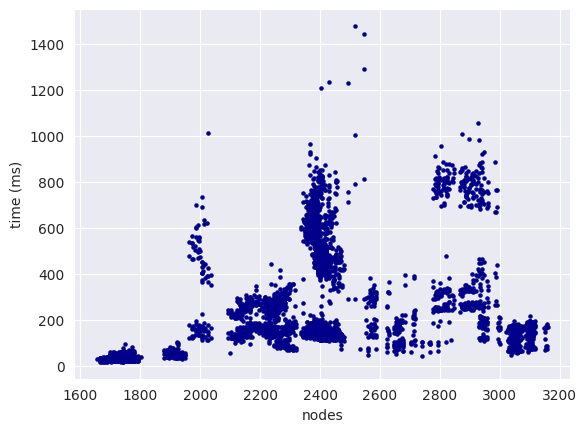

In [108]:
df.plot.scatter(x='nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

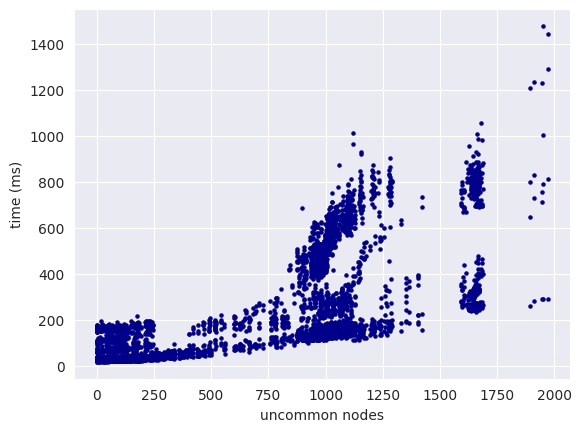

In [109]:
df.plot.scatter(x='uncommon_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

<Axes: xlabel='common nodes', ylabel='time (ms)'>

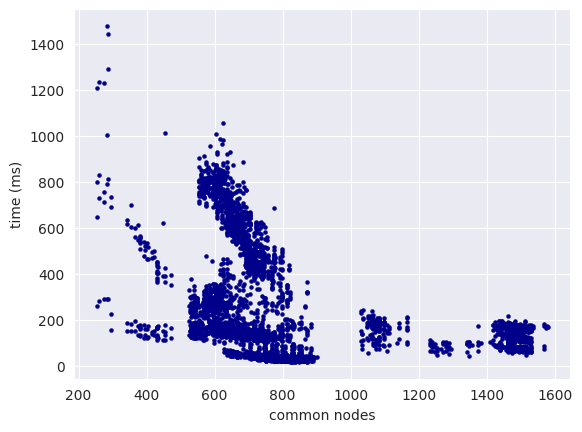

In [110]:
df.plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

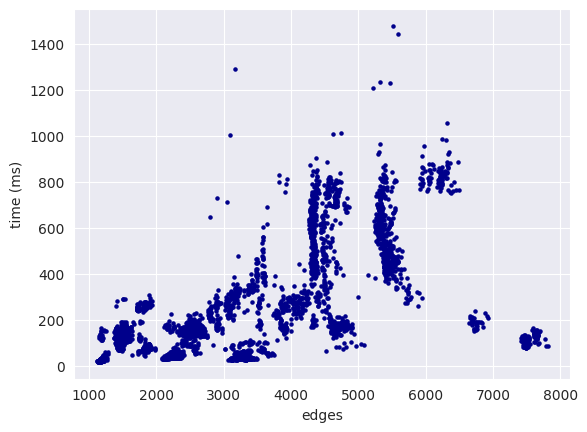

In [112]:
df.plot.scatter(x='edges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='common edges', ylabel='time (ms)'>

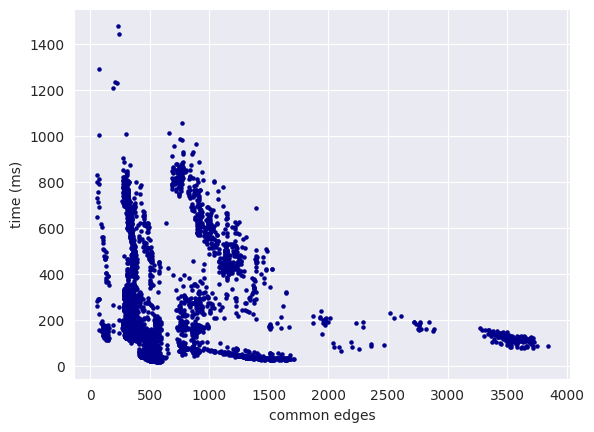

In [114]:
df.plot.scatter(x='generalization_edges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

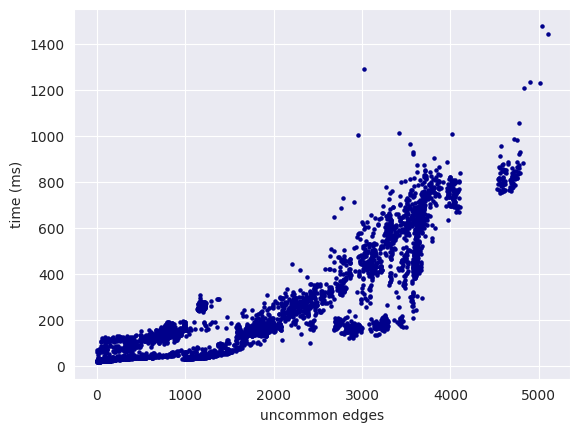

In [115]:
df.plot.scatter(x='uncommon_edges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

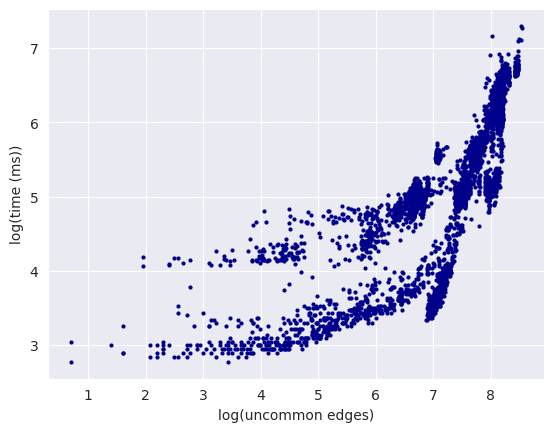

In [117]:
df.plot.scatter(x='log_uncommon_edges', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

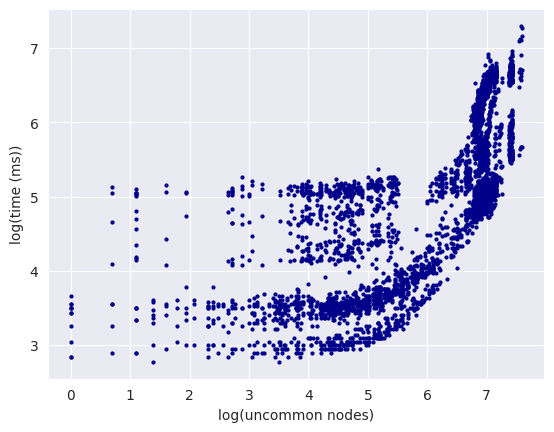

In [118]:
df.plot.scatter(x='log_uncommon_nodes', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

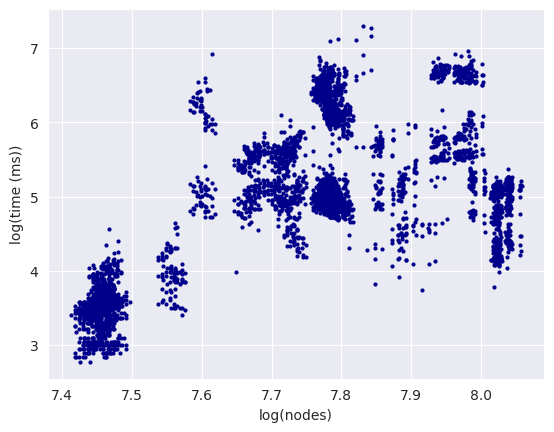

In [119]:
df.plot.scatter(x='log_nodes', y='log_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

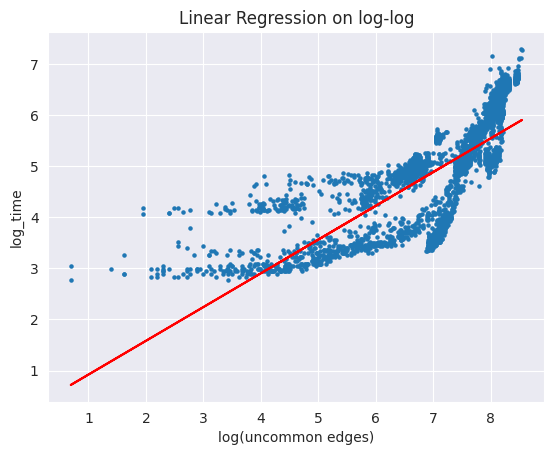

(array([[0.66120729]]), array([0.25997117]), 0.5546120322958428)

In [120]:
linear_regression_of(df, 'log_uncommon_edges', 'log_time', x_label='log(uncommon edges)', y_label='log_time', title='Linear Regression on log-log')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

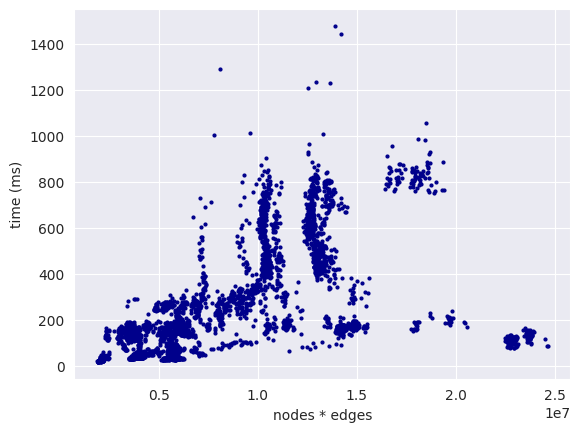

In [121]:
df.plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

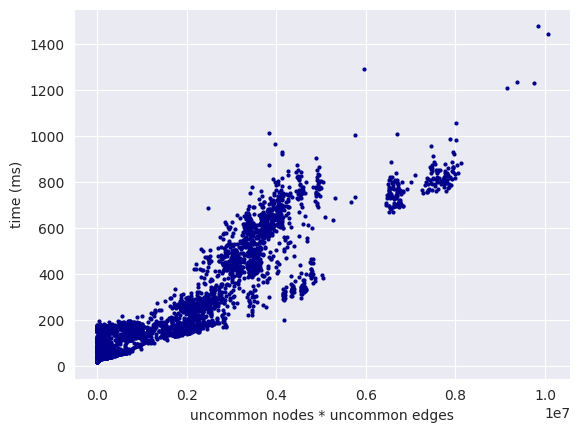

In [123]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

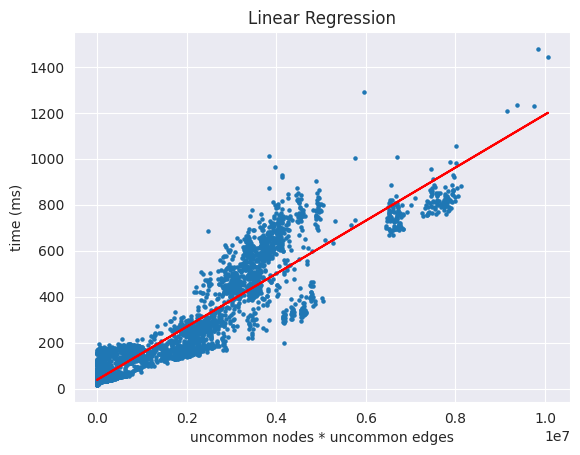

(array([[0.00011552]]), array([37.77089579]), 0.8452261638011412)

In [124]:
linear_regression_of(df[df['uncommon_nodes_X_uncommon_edges'] != 0], 'uncommon_nodes_X_uncommon_edges', 'time', x_label='uncommon nodes * uncommon edges', y_label='time (ms)', title='Linear Regression')

In [134]:
df1 = df[df['uncommon_nodes'] > 350]
df2 = df[df['uncommon_nodes'] <= 350]

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

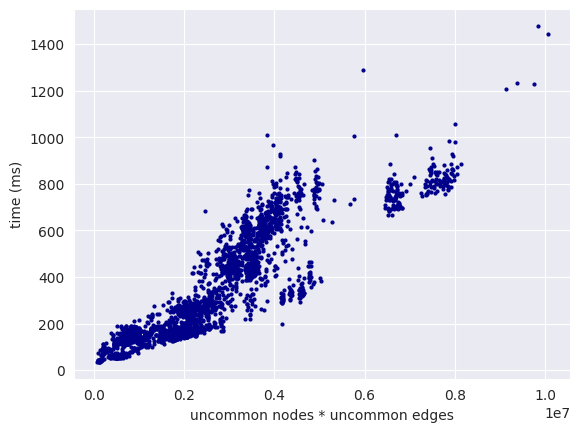

In [135]:
df1.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

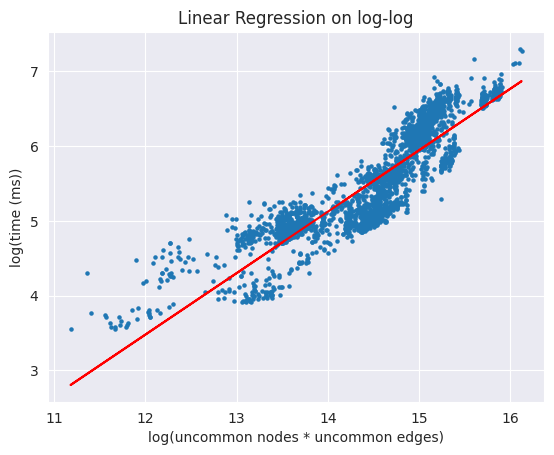

(array([[0.82164337]]), array([-6.38072269]), 0.7836224111676304)

In [136]:
linear_regression_of(df1[df1['uncommon_nodes_X_uncommon_edges'] != 0], 'log_uncommon_nodes_X_uncommon_edges', 'log_time', x_label='log(uncommon nodes * uncommon edges)', y_label='log(time (ms))', title='Linear Regression on log-log')

<Axes: xlabel='nodes', ylabel='time (ms)'>

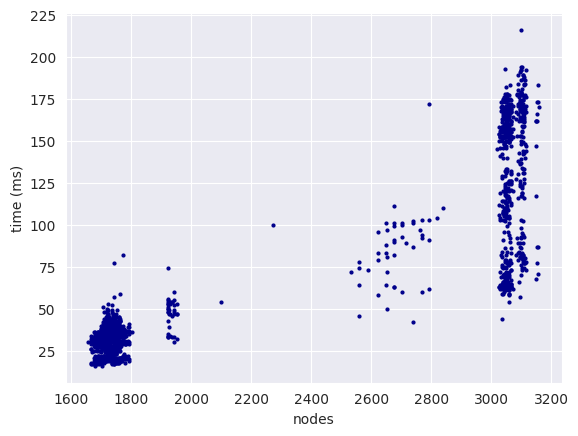

In [128]:
df2.plot.scatter(x='nodes', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='edges', ylabel='time (ms)'>

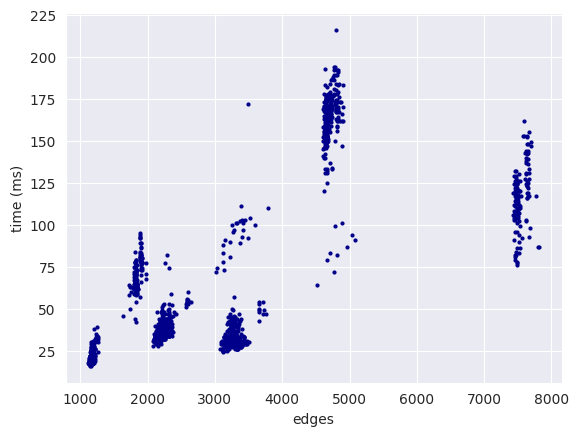

In [129]:
df2.plot.scatter(x='edges', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

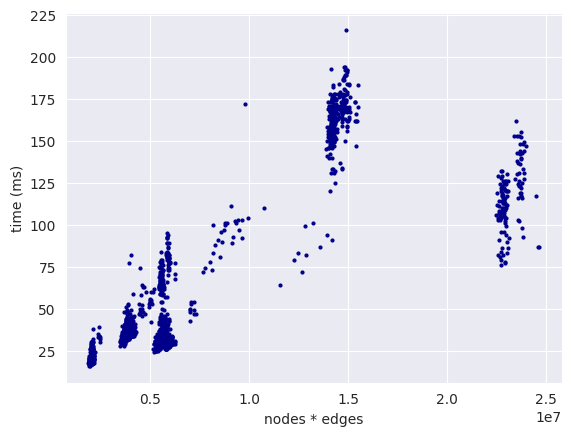

In [130]:
df2.plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes', ylabel='time (ms)'>

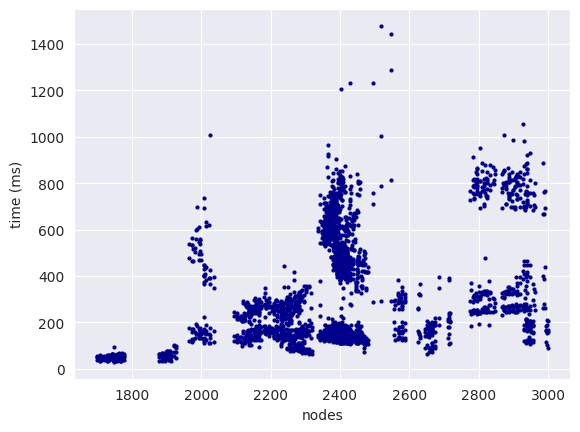

In [132]:
df1.plot.scatter(x='nodes', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='nodesXedges', ylabel='time (ms)'>

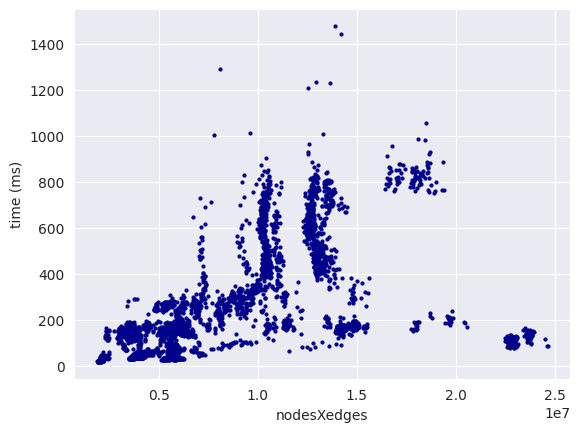

In [133]:
df.plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodesXedges')

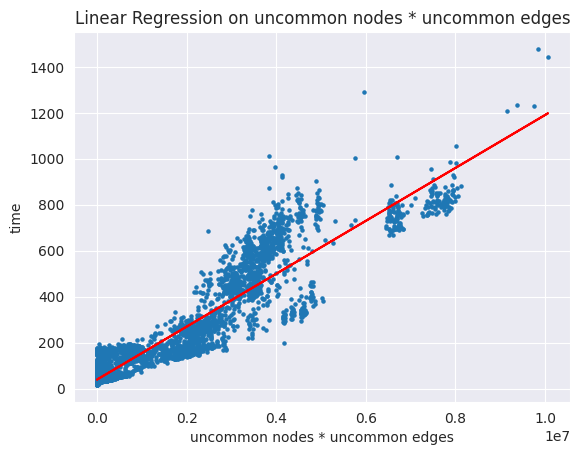

(array([[0.00011515]]), array([39.09184787]), 0.8445897937956791)

In [145]:
linear_regression_of(df, 'uncommon_nodes_X_uncommon_edges', 'time', x_label='uncommon nodes * uncommon edges', y_label='time', title='Linear Regression on uncommon nodes * uncommon edges')

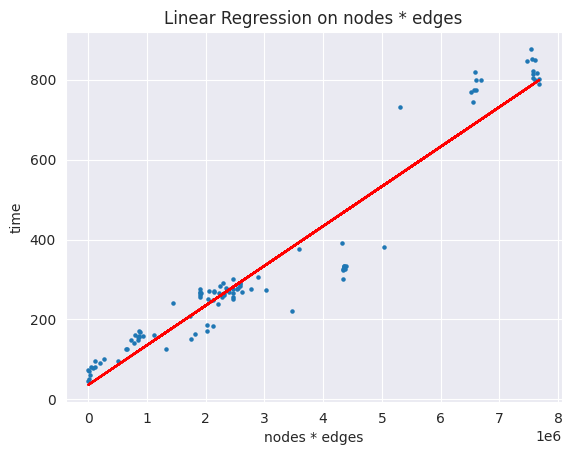

(array([[9.93283973e-05]]), array([36.1752013]), 0.9235253145749325)

In [162]:
linear_regression_of(df[df['g1_nodes'] == 1294], 'uncommon_nodes_X_uncommon_edges', 'time', x_label='nodes * edges', y_label='time', title='Linear Regression on nodes * edges')

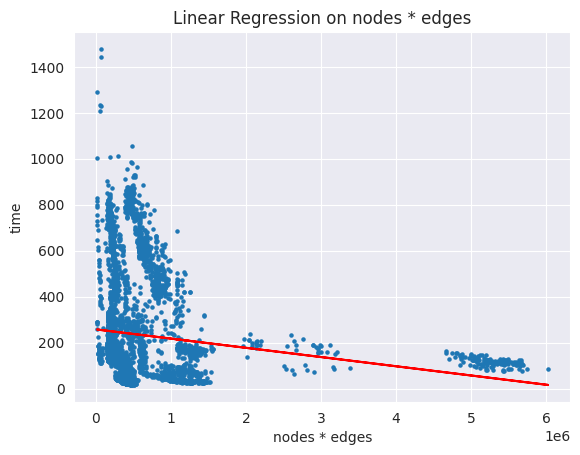

(array([[-4.01420064e-05]]), array([257.44101629]), 0.025678040241625122)

In [175]:
linear_regression_of(df, 'common_nodes_X_common_edges', 'time', x_label='nodes * edges', y_label='time', title='Linear Regression on nodes * edges')